<a href="https://colab.research.google.com/github/aeapolimi/duckietown/blob/main/duckietown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AEA X Duckietown

Duckietown first run example (https://www.duckietown.org/)

##Install duckiewtown gym

In [1]:
import os 
if not os.path.isdir('gym-duckietown') or os.path.isdir('../gym-duckietown'):
  branch = "master" #@param ['master', 'daffy']
  !git clone --branch {branch} https://github.com/duckietown/gym-duckietown.git
  !pip3 install -e gym-duckietown

In [2]:
if os.getcwd() != "/gym-duckietown":
  os.chdir('gym-duckietown')

## Virtual display

In [3]:
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [4]:
!pip3 install pyvirtualdisplay

In [5]:
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
%matplotlib inline

# Test

A simple test to show how the environment works and to test the display

In [6]:
!pip3 install gym

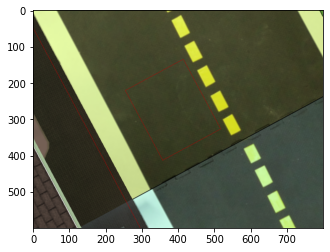

In [7]:
import gym
from gym_duckietown.envs import DuckietownEnv

display = Display(visible=0, size=(1400, 900))
display.start()

env = DuckietownEnv(
    map_name="udem1",
    draw_curve="store_true",
    draw_bbox="store_true",
    domain_rand="store_true",
)

env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(10):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)


## Basic control
An example of a simple policy.

Example taken from https://github.com/duckietown/gym-duckietown/blob/master/exercises/basic_control.py

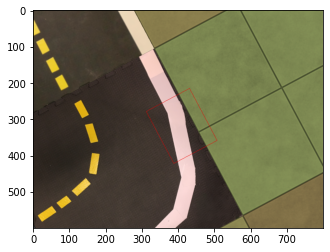

*** CRASHED ***
Final Reward = -958.432


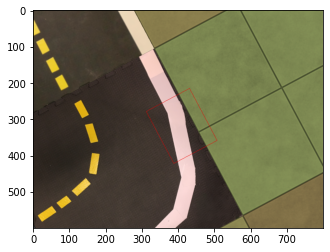

In [8]:
total_reward = 0

display = Display(visible=0, size=(1400, 900))
display.start()

env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

while True:

    lane_pose = env.get_lane_pos2(env.cur_pos, env.cur_angle)
    distance_to_road_center = lane_pose.dist
    angle_from_straight_in_rads = lane_pose.angle_rad

    ###### Start changing the code here.
    # TODO: Decide how to calculate the speed and direction.

    k_p = 10
    k_d = 1
    
    # The speed is a value between [0, 1] (which corresponds to a real speed between 0m/s and 1.2m/s)
    # If this value is too high it will crash in no time, try to set it to 1.
    speed = 0.5 

    # angle of the steering wheel, which corresponds to the angular velocity in rad/s
    steering = k_p*distance_to_road_center + k_d*angle_from_straight_in_rads # TODO: You should overwrite this value

    ###### No need to edit code below.
    
    obs, reward, done, info = env.step([speed, steering])
    total_reward += reward
    
    print('Steps = %s, Timestep Reward=%.3f, Total Reward=%.3f' % (env.step_count, reward, total_reward))

    screen = env.render(mode='rgb_array')
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    if done:
        if reward < 0:
            print('*** CRASHED ***')
        print ('Final Reward = %.3f' % total_reward)
        break